## Sandoval Rivero Isaac Tadeo (20390029)
### Coffee Quality

In [369]:
import numpy as np
from sklearn.linear_model import LassoCV, lasso_path, Lasso
from sklearn.preprocessing import StandardScaler
from math import sqrt
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets,linear_model
from sklearn.metrics import roc_curve,auc


In [370]:
#Cree la función para leer el archivo csv
def leer_datos_cafes():
    import pandas as pd
    filename = 'df_arabica_clean.csv'
    cafes = pd.read_csv(filename, header=0)
    columnas = cafes.columns
    tam = len(columnas)
    datos = cafes.iloc[:, 0:tam]
    etiquetas = cafes.iloc[:, tam-10]
    return columnas, datos, etiquetas

In [371]:
#Se leen los datos, y se guardan en las variables respectivas
columnas, datos, etiquetas = leer_datos_cafes()

In [372]:
#Imprimí el número de filas
print('Numero de filas de datos =', str(len(datos)))

Numero de filas de datos = 207


In [373]:
#Imprimí el número de columnas para verificar que coincidan con los de la página web
ncols = len(columnas)
print("Número de columnas:", ncols)
print(columnas)

Número de columnas: 41
Index(['Unnamed: 0', 'ID', 'Country of Origin', 'Farm Name', 'Lot Number',
       'Mill', 'ICO Number', 'Company', 'Altitude', 'Region', 'Producer',
       'Number of Bags', 'Bag Weight', 'In-Country Partner', 'Harvest Year',
       'Grading Date', 'Owner', 'Variety', 'Status', 'Processing Method',
       'Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance',
       'Uniformity', 'Clean Cup', 'Sweetness', 'Overall', 'Defects',
       'Total Cup Points', 'Moisture Percentage', 'Category One Defects',
       'Quakers', 'Color', 'Category Two Defects', 'Expiration',
       'Certification Body', 'Certification Address', 'Certification Contact'],
      dtype='object')


In [374]:
#Imprimí los datos para saber el tamaño del dataframe y conocer un poco los atributos
datos

,Unnamed: 0,ID,Country of Origin,Farm Name,Lot Number,Mill,ICO Number,Company,Altitude,Region,...,Total Cup Points,Moisture Percentage,Category One Defects,Quakers,Color,Category Two Defects,Expiration,Certification Body,Certification Address,Certification Contact
0,0,0,Colombia,Finca El Paraiso,CQU2022015,Finca El Paraiso,NaN,Coffee Quality Union,1700-1930,"Piendamo,Cauca",...,89.33,11.8,0,0,green,3,"September 21st, 2023",Japan Coffee Exchange,"〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Ata...",松澤 宏樹 Koju Matsuzawa - +81(0)9085642901
1,1,1,Taiwan,Royal Bean Geisha Estate,"The 2022 Pacific Rim Coffee Summit,T037",Royal Bean Geisha Estate,NaN,Taiwan Coffee Laboratory,1200,Chiayi,...,87.58,10.5,0,0,blue-green,0,"November 15th, 2023",Taiwan Coffee Laboratory 台灣咖啡研究室,"QAHWAH CO., LTD 4F, No. 225, Sec. 3, Beixin Rd...","Lin, Jen-An Neil 林仁安 - 886-289116612"
2,2,2,Laos,OKLAO coffee farms,"The 2022 Pacific Rim Coffee Summit,LA01",oklao coffee processing plant,NaN,Taiwan Coffee Laboratory,1300,Laos Borofen Plateau,...,87.42,10.4,0,0,yellowish,2,"November 15th, 2023",Taiwan Coffee Laboratory 台灣咖啡研究室,"QAHWAH CO., LTD 4F, No. 225, Sec. 3, Beixin Rd...","Lin, Jen-An Neil 林仁安 - 886-289116612"
3,3,3,Costa Rica,La Cumbre,CQU2022017,La Montana Tarrazu MIll,NaN,Coffee Quality Union,1900,"Los Santos,Tarrazu",...,87.17,11.8,0,0,green,0,"September 21st, 2023",Japan Coffee Exchange,"〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Ata...",松澤 宏樹 Koju Matsuzawa - +81(0)9085642901
4,4,4,Colombia,Finca Santuario,CQU2023002,Finca Santuario,NaN,Coffee Quality Union,1850-2100,"Popayan,Cauca",...,87.08,11.6,0,2,yellow-green,2,"March 5th, 2024",Japan Coffee Exchange,"〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Ata...",松澤 宏樹 Koju Matsuzawa - +81(0)9085642901
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,202,202,Brazil,Fazenda Conquista,019/22,Dry Mill,NaN,Ipanema Coffees,950,Sul de Minas,...,80.08,11.4,0,0,green,4,"February 2nd, 2024",Brazil Specialty Coffee Association,"Rua Gaspar Batista Paiva, 416 – Santa Luiza Va...",Chris Allen - 55 35 3212-4705
203,203,203,Nicaragua,Finca San Felipe,017-053-0155,Beneficio Atlantic Sébaco,017-053-0155,Exportadora Atlantic S.A,1200,Matagalpa,...,80.00,10.4,0,2,green,12,"March 2nd, 2024",Asociación de Cafés Especiales de Nicaragua,"Del Hotel Seminole 2 C al lago, 1 C arriba.",Maria Ines Benavidez Toval - 011-(505)-8396 4717
204,204,204,Laos,-,105/3/VL7285-005,DRY MILL,105/3/VL7285-005,Marubeni Corporation,1300,Bolaven Plateau,...,79.67,11.6,0,9,green,11,"November 11th, 2023",Japan Coffee Exchange,"〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Ata...",松澤 宏樹 Koju Matsuzawa - +81(0)9085642901
205,205,205,El Salvador,"Rosario de Maria II, Area de La Pila",0423A01,"Optimum Coffee, San Salvador, El Salvador",NaN,Aprentium Enterprises LLC,1200,"Volcan de San Vicente, La Paz, El Salvador",...,78.08,11.0,0,12,bluish-green,13,"March 7th, 2024",Salvadoran Coffee Council,"Final 1a. Av. Norte y 13 Calle Pte., dentro de...",Tomas Bonilla - (503) 2505-6600


In [375]:
#Imprimí la información de los datos
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             207 non-null    int64  
 1   ID                     207 non-null    int64  
 2   Country of Origin      207 non-null    object 
 3   Farm Name              205 non-null    object 
 4   Lot Number             206 non-null    object 
 5   Mill                   204 non-null    object 
 6   ICO Number             75 non-null     object 
 7   Company                207 non-null    object 
 8   Altitude               206 non-null    object 
 9   Region                 205 non-null    object 
 10  Producer               206 non-null    object 
 11  Number of Bags         207 non-null    int64  
 12  Bag Weight             207 non-null    object 
 13  In-Country Partner     207 non-null    object 
 14  Harvest Year           207 non-null    object 
 15  Gradin

In [376]:
#Imprimí las etiquetas que califican la calidad del café
etiquetas

0      89.33
1      87.58
2      87.42
3      87.17
4      87.08
       ...  
202    80.08
203    80.00
204    79.67
205    78.08
206    78.00
Name: Total Cup Points, Length: 207, dtype: float64

In [377]:
#Borré las columnas que contengan datos NO númericos y guardarlas en una nueva variable (datosEnteros)
cols_a_borrar = []
for columna in range(ncols):
    if(datos.dtypes.iloc[columna] == 'object'):
        cols_a_borrar.append(columnas[columna])
        
datosEnteros = datos
for col in cols_a_borrar:
    datosEnteros=datosEnteros.drop(columns=[col])

In [378]:
#Reimprimí la información de datos para comprobar que sí se borraron las columnas deseadas
datosEnteros.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            207 non-null    int64  
 1   ID                    207 non-null    int64  
 2   Number of Bags        207 non-null    int64  
 3   Aroma                 207 non-null    float64
 4   Flavor                207 non-null    float64
 5   Aftertaste            207 non-null    float64
 6   Acidity               207 non-null    float64
 7   Body                  207 non-null    float64
 8   Balance               207 non-null    float64
 9   Uniformity            207 non-null    float64
 10  Clean Cup             207 non-null    float64
 11  Sweetness             207 non-null    float64
 12  Overall               207 non-null    float64
 13  Defects               207 non-null    float64
 14  Total Cup Points      207 non-null    float64
 15  Moisture Percentage   2

In [379]:
#Reimprimí los datos enteros para verificar
datosEnteros

,Unnamed: 0,ID,Number of Bags,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean Cup,Sweetness,Overall,Defects,Total Cup Points,Moisture Percentage,Category One Defects,Quakers,Category Two Defects
0,0,0,1,8.58,8.50,8.42,8.58,8.25,8.42,10.0,10.0,10.0,8.58,0.0,89.33,11.8,0,0,3
1,1,1,1,8.50,8.50,7.92,8.00,7.92,8.25,10.0,10.0,10.0,8.50,0.0,87.58,10.5,0,0,0
2,2,2,19,8.33,8.42,8.08,8.17,7.92,8.17,10.0,10.0,10.0,8.33,0.0,87.42,10.4,0,0,2
3,3,3,1,8.08,8.17,8.17,8.25,8.17,8.08,10.0,10.0,10.0,8.25,0.0,87.17,11.8,0,0,0
4,4,4,2,8.33,8.33,8.08,8.25,7.92,7.92,10.0,10.0,10.0,8.25,0.0,87.08,11.6,0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,202,202,2240,7.17,7.17,6.92,7.17,7.42,7.17,10.0,10.0,10.0,7.08,0.0,80.08,11.4,0,0,4
203,203,203,300,7.33,7.08,6.75,7.17,7.42,7.17,10.0,10.0,10.0,7.08,0.0,80.00,10.4,0,2,12
204,204,204,343,7.25,7.17,7.08,7.00,7.08,7.08,10.0,10.0,10.0,7.00,0.0,79.67,11.6,0,9,11
205,205,205,1,6.50,6.75,6.75,7.17,7.08,7.00,10.0,10.0,10.0,6.83,0.0,78.08,11.0,0,12,13


In [380]:
#Hice un .describe() a la variable de datosEnteros para saber la media, la desviación estandar, el valor mínimo, entre
#otros valores estadísticos
datosEnteros.describe()

,Unnamed: 0,ID,Number of Bags,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean Cup,Sweetness,Overall,Defects,Total Cup Points,Moisture Percentage,Category One Defects,Quakers,Category Two Defects
count,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.00000,207.000000,207.000000,207.000000,207.0,207.0,207.000000,207.0,207.000000,207.000000,207.000000,207.000000,207.000000
mean,103.000000,103.000000,155.449275,7.721063,7.744734,7.599758,7.69029,7.640918,7.644058,9.990338,10.0,10.0,7.676812,0.0,83.706570,10.735266,0.135266,0.690821,2.251208
std,59.899917,59.899917,244.484868,0.287626,0.279613,0.275911,0.25951,0.233499,0.256299,0.103306,0.0,0.0,0.306359,0.0,1.730417,1.247468,0.592070,1.686918,2.950183
min,0.000000,0.000000,1.000000,6.500000,6.750000,6.670000,6.83000,6.830000,6.670000,8.670000,10.0,10.0,6.670000,0.0,78.000000,0.000000,0.000000,0.000000,0.000000
25%,51.500000,51.500000,1.000000,7.580000,7.580000,7.420000,7.50000,7.500000,7.500000,10.000000,10.0,10.0,7.500000,0.0,82.580000,10.100000,0.000000,0.000000,0.000000
50%,103.000000,103.000000,14.000000,7.670000,7.750000,7.580000,7.67000,7.670000,7.670000,10.000000,10.0,10.0,7.670000,0.0,83.750000,10.800000,0.000000,0.000000,1.000000
75%,154.500000,154.500000,275.000000,7.920000,7.920000,7.750000,7.87500,7.750000,7.790000,10.000000,10.0,10.0,7.920000,0.0,84.830000,11.500000,0.000000,1.000000,3.000000
max,206.000000,206.000000,2240.000000,8.580000,8.500000,8.420000,8.58000,8.250000,8.420000,10.000000,10.0,10.0,8.580000,0.0,89.330000,13.500000,5.000000,12.000000,16.000000


In [381]:
"""
Debido a que los datos solo utilizan 10 columnas como datos para calificar la calidad del café, saqué en una nueva variable, 
dichas columnas que son:
    - Aroma: Refers to the scent or fragrance of the coffee.
    - Flavor: The flavor of coffee is evaluated based on the taste, including any sweetness, bitterness, acidity, and other flavor notes.
    - Aftertaste: Refers to the lingering taste that remains in the mouth after swallowing the coffee.
    - Acidity: Acidity in coffee refers to the brightness or liveliness of the taste.
    - Body: The body of coffee refers to the thickness or viscosity of the coffee in the mouth.
    - Balance: Balance refers to how well the different flavor components of the coffee work together.
    - Uniformity: Uniformity refers to the consistency of the coffee from cup to cup.
    - Clean Cup: A clean cup refers to a coffee that is free of any off-flavors or defects, such as sourness, mustiness, or staleness.
    - Sweetness: It can be described as caramel-like, fruity, or floral, and is a desirable quality in coffee.
    - Overall
"""
datosCalificativos = datosEnteros.iloc[:, 3:13]
datosCalificativos

,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean Cup,Sweetness,Overall
0,8.58,8.50,8.42,8.58,8.25,8.42,10.0,10.0,10.0,8.58
1,8.50,8.50,7.92,8.00,7.92,8.25,10.0,10.0,10.0,8.50
2,8.33,8.42,8.08,8.17,7.92,8.17,10.0,10.0,10.0,8.33
3,8.08,8.17,8.17,8.25,8.17,8.08,10.0,10.0,10.0,8.25
4,8.33,8.33,8.08,8.25,7.92,7.92,10.0,10.0,10.0,8.25
...,...,...,...,...,...,...,...,...,...,...
202,7.17,7.17,6.92,7.17,7.42,7.17,10.0,10.0,10.0,7.08
203,7.33,7.08,6.75,7.17,7.42,7.17,10.0,10.0,10.0,7.08
204,7.25,7.17,7.08,7.00,7.08,7.08,10.0,10.0,10.0,7.00
205,6.50,6.75,6.75,7.17,7.08,7.00,10.0,10.0,10.0,6.83


In [382]:
#Hice un .describe() a la variable de datosCalificativos para saber la media, la desviación estandar, el valor mínimo, entre
#otros valores estadísticos
datosCalificativos.describe()

,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean Cup,Sweetness,Overall
count,207.000000,207.000000,207.000000,207.00000,207.000000,207.000000,207.000000,207.0,207.0,207.000000
mean,7.721063,7.744734,7.599758,7.69029,7.640918,7.644058,9.990338,10.0,10.0,7.676812
std,0.287626,0.279613,0.275911,0.25951,0.233499,0.256299,0.103306,0.0,0.0,0.306359
min,6.500000,6.750000,6.670000,6.83000,6.830000,6.670000,8.670000,10.0,10.0,6.670000
25%,7.580000,7.580000,7.420000,7.50000,7.500000,7.500000,10.000000,10.0,10.0,7.500000
50%,7.670000,7.750000,7.580000,7.67000,7.670000,7.670000,10.000000,10.0,10.0,7.670000
75%,7.920000,7.920000,7.750000,7.87500,7.750000,7.790000,10.000000,10.0,10.0,7.920000
max,8.580000,8.500000,8.420000,8.58000,8.250000,8.420000,10.000000,10.0,10.0,8.580000


## Metricas para medir el desempeño de los modelos
- Mean squared error - Error cuadratico medio: $MSE= \frac{1}{m}\sum_{i=1}^{m}(x_{i}-pred(x_{i}))^{2} $
- Mean absolute error- Error obsoluto medio: $MAE=\frac{1}{m}\sum_{i=1}^{m}|x_{i}-pred(x_{i})|$ 

In [383]:
#Sacamos las predicciones para hacer la resta de los valores reales (etiquetas) respecto a las predicciones
modelo_cafe_MSE = linear_model.LinearRegression()
modelo_cafe_MSE.fit(datosCalificativos, etiquetas)
prediccionesDatosCalificativos = modelo_cafe_MSE.predict(datosCalificativos)

In [384]:
#Realicé la resta de las etiquetas contra las predicciones
error = []
for i in range(len(etiquetas)):
    error.append(etiquetas[i]-prediccionesDatosCalificativos[i])
    
print("Errores: ", error)

Errores:  [0.0007624170951743281, -0.008668705272285138, 0.000587678300618677, 8.71039317900113e-05, 0.0007702680102710247, 0.007248630251552868, 0.01004670374062755, -0.0007603758407981331, 0.007761240301093153, 0.0007621272507094545, 0.0006518146282132875, 0.00024981259949186096, 0.010371175098441654, 0.0010928760431312412, 0.009676292109233486, -0.009665243110262622, -0.00832901717824086, -0.020948923441679312, 0.0016702204079450667, -0.018626952126894025, -0.001471430987550093, 0.0009091079533192215, 0.010944501287710295, 0.012340522553714095, -0.009250923881594986, 0.010683531185321726, -0.010720591888372155, 0.0007015506165544139, -0.010430167233010934, -0.001112498188078348, 0.010203741497392116, 0.0006561195024659128, -0.00803258687908226, 0.0011209034133656814, -0.0003023229245258108, 0.0028521699194357097, 0.0012023049712297507, 0.00047624999496065357, 0.00031142855544885606, 0.001554115873730666, -0.009140310051279243, 0.002189857215839197, -0.007010873712133048, -0.00892225

In [385]:
#Calculé los errores cuadrados y los errores absolutos
errorCuadratico = []
errorAbsoluto = []

for i in error:
    errorCuadratico.append(i*i)
    errorAbsoluto.append(abs(i))

In [386]:
#Imprimí los errores cuadráticos y absolutos
print("Errores cuadrático = ", errorCuadratico, "\n")
print("Errores absoluto = ", errorAbsoluto, "\n")

Errores cuadrático =  [5.812798270140605e-07, 7.514645109774415e-05, 3.453657850180561e-07, 7.587094933278941e-09, 5.933128076468834e-07, 5.254264052372739e-05, 0.00010093625605193959, 5.781714192694679e-07, 6.023685101131254e-05, 5.808379462739518e-07, 4.2486230955282624e-07, 6.240633486488093e-08, 0.00010756127292253625, 1.1943780456501986e-06, 9.363062898321424e-05, 9.341692438047909e-05, 6.937252715543135e-05, 0.000438857393365341, 2.789636211116185e-06, 0.00034696334553760183, 2.165109151122642e-06, 8.264772707882638e-07, 0.00011978210843669231, 0.00015228849689872626, 8.557959266306443e-05, 0.00011413783858774184, 0.00011493109043703086, 4.921732675878783e-07, 0.00010878838850857496, 1.2376522184776073e-06, 0.0001041163405456019, 4.304928015161169e-07, 6.452245197000448e-05, 1.2564244620948357e-06, 9.139915069383908e-08, 8.134873249333903e-06, 1.4455372438437715e-06, 2.2681405770002255e-07, 9.698774514896121e-08, 2.4152761489816314e-06, 8.354526783351637e-05, 4.795474625763e-06, 

In [387]:
#Calculé e imprimí la media del MSE y del MAE
print("MSE = ", sum(errorCuadratico)/len(errorCuadratico))
print("MAE = ", sum(errorAbsoluto)/len(errorAbsoluto))

#Calcular e imprimir la raiz cuadrada de MSE (RMSE)
print("RMSE = ", sqrt(sum(errorCuadratico)/len(errorCuadratico)))

MSE =  6.155913828102244e-05
MAE =  0.006025841886163241
RMSE =  0.007845963183766697


In [388]:
#Comparé MSE con la desviación de la variable "etiquetas"
desviacionEtiquetas = []
mediaEtiquetas = sum(etiquetas)/len(etiquetas)

for val in etiquetas:
    desviacionEtiquetas.append((val - mediaEtiquetas) * (val - mediaEtiquetas))

In [389]:
#Imprimí la media, la desviación estándar y la varianza de la variable "etiquetas"
print("Media de 'Etiquetas' = ", mediaEtiquetas)
print("Desviación estándar de 'Etiquetas' = ", sqrt(sum(desviacionEtiquetas)/len(desviacionEtiquetas)))
print("Varianza de 'Etiquetas' = ", sum(desviacionEtiquetas)/len(desviacionEtiquetas))

Media de 'Etiquetas' =  83.70657004830917
Desviación estándar de 'Etiquetas' =  1.7262321997379377
Varianza de 'Etiquetas' =  2.9798776074120794


In [390]:
#MSE es comparado con la varianza de la variable "etiquetas" y 
#si sus valores son similares nos dice que el algoritmo tiene un desempeño bastante bueno
print("MSE = ", sum(errorCuadratico)/len(errorCuadratico))
print("Varianza de 'Etiquetas' = ", sum(desviacionEtiquetas)/len(desviacionEtiquetas))

MSE =  6.155913828102244e-05
Varianza de 'Etiquetas' =  2.9798776074120794


In [391]:
#RMSE es comparado con la desviación estándar de la variable "etiquetas" y 
#si sus valores son similares nos dice que el algoritmo tiene un desempeño bastante bueno
print("MAE = ", sum(errorAbsoluto)/len(errorAbsoluto))
print("Desviación estándar de 'Etiquetas' = ", sqrt(sum(desviacionEtiquetas)/len(desviacionEtiquetas)))

MAE =  0.006025841886163241
Desviación estándar de 'Etiquetas' =  1.7262321997379377


## Matriz de Confusión para sacar la curva ROC y el AUC

In [392]:
#Convertí los datos y etiquetas en "si es mayor a 83.5 entonces la etiqueta = 1 y si es menor a 83.5 entonces la etiqueta = 0"
etiquetasROC = []
for label in etiquetas:
    if(label > 83.5):
        etiquetasROC.append(1.0)
    else:
        etiquetasROC.append(0.0)
    
datosROC = []
for data in range(len(datosCalificativos)):
    if(sum(datosCalificativos.iloc[data]) > 83.5):
        datosROC.append(datosCalificativos.iloc[data]*0.01)
    else:
        datosROC.append(datosCalificativos.iloc[data]*0.01)
        

In [393]:
def matrizDeConfusion(predicho, real, limite):
    if(len(predicho) != len(real)):
        return -1
    
    verdaderoPositivo=0.0
    falsoPositivo=0.0
    verdaderoNegativo=0.0
    falsoNegativo=0.0
    
    for i in range(len(real)):
        if(predicho[i] > 0.5): #Etiquetas mayores a 0.5
            if(predicho[i] > limite):
                verdaderoPositivo += 1.0 #Valores positivos correctamente predichos
            else:
                falsoNegativo += 1.0 #Valores negativos incorrectamente predichos
        else: #Etiquetas menores a 0.5
            if(predicho[i] < limite):
                verdaderoNegativo += 1.0 #Valores negativos correctamente predichos
            else:
                falsoPositivo += 1.0 #Valores positivos incorrectamente predichos
                
    matrizConfusion = [verdaderoPositivo, falsoNegativo, falsoPositivo, verdaderoNegativo]
    return matrizConfusion

In [394]:
#Dividí los datos y las etiquetas en 2/3 para entrenar y 1/3 para probar
numeroDatos = range(len(etiquetas))
datosPrueba=[datosROC[i] for i in numeroDatos if i%3==0]
datosEntreno=[datosROC[i] for i in numeroDatos if i%3!=0]
etiquetasPrueba=[etiquetasROC[i] for i in numeroDatos if i%3==0]
etiquetasEntreno=[etiquetasROC[i] for i in numeroDatos if i%3!=0]

In [395]:
print("Número de datos de entrenamiento ", len(datosEntreno), " y número de etiquetas de entrenamiento ", len(etiquetasEntreno))
print("Número de datos de prueba ", len(datosPrueba), " y número de etiquetas de prueba ", len(etiquetasPrueba))

Número de datos de entrenamiento  138  y número de etiquetas de entrenamiento  138
Número de datos de prueba  69  y número de etiquetas de prueba  69


### Curva ROC para los datos de entrenamiento

In [396]:
#Definí el modelo de regresión lineal de entrenamiento
modelo_calidad_cafe = linear_model.LinearRegression()
#Corrí el modelo de entrenamiento con los datos de datosEntreno y las etiquetas de etiquetasEntreno
modelo_calidad_cafe.fit(datosEntreno, etiquetasEntreno)

LinearRegression()

In [397]:
#Generé las predicciones e imprimí las primeras 5 respecto a los valores reales
prediccionesDelEntrenamiento = modelo_calidad_cafe.predict(datosEntreno)
print("Predicciones del entrenamiento: ", prediccionesDelEntrenamiento[:5]) 
print("Valores reales: ", etiquetasEntreno[:5])

Predicciones del entrenamiento:  [1.35804215 1.33232324 1.33623772 1.20837086 1.16625831]
Valores reales:  [1.0, 1.0, 1.0, 1.0, 1.0]


In [398]:
#Generé la matriz de confusión para las predicciones en el conjunto de entrenamiento con un límite de 0.5
matrizDeConfusionDelEntrenamiento = matrizDeConfusion(prediccionesDelEntrenamiento, etiquetasEntreno, 0.5)
matrizDeConfusionDelEntrenamiento

[76.0, 0.0, 0.0, 62.0]

In [399]:
#Extraje los resultados de la matriz de confusión
verdaderoPositivo=matrizDeConfusionDelEntrenamiento[0]
falsoNegativo=matrizDeConfusionDelEntrenamiento[1]
falsoPositivo=matrizDeConfusionDelEntrenamiento[2]
verdaderoNegativo=matrizDeConfusionDelEntrenamiento[3]

print("\ntp = ", str(verdaderoPositivo), "\tfn = ", str(falsoNegativo), "\nfp = ", str(falsoPositivo), "\ttn = ", str(verdaderoNegativo))


tp =  76.0 	fn =  0.0 
fp =  0.0 	tn =  62.0


In [400]:
#Saqué las variables necesarias para la curva roc con los datos del entrenamiento
fpr, tpr, thresholds = roc_curve(etiquetasEntreno, prediccionesDelEntrenamiento)

In [401]:
#Calculé el área bajo la curva
roc_auc = auc(fpr, tpr)
print("AUC = ", roc_auc)

AUC =  0.9947089947089947


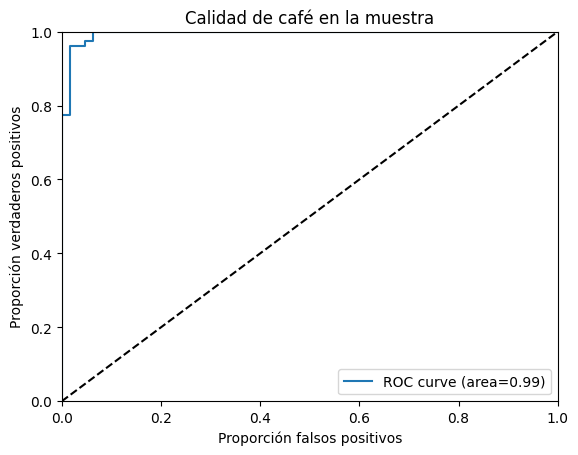

In [402]:
plt.clf()
plt.plot(fpr, tpr, label='ROC curve (area=%0.2f)' % roc_auc)
plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel("Proporción falsos positivos")
plt.ylabel("Proporción verdaderos positivos")
plt.title("Calidad de café en la muestra")
plt.legend(loc="lower right")
plt.show()

### Curva ROC para los datos de prueba

In [403]:
#Saqué las variables necesarias para la curva roc con los datos de prueba
prediccionesDeLaPrueba = modelo_calidad_cafe.predict(datosPrueba)
fpr, tpr, thresholds = roc_curve(etiquetasPrueba, prediccionesDeLaPrueba)

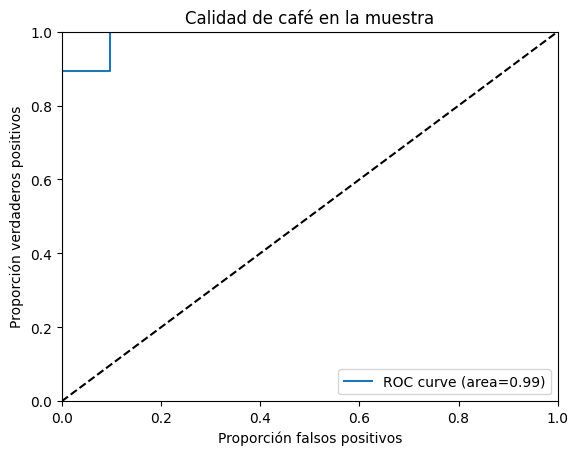

In [404]:
plt.clf()
plt.plot(fpr, tpr, label='ROC curve (area=%0.2f)' % roc_auc)
plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel("Proporción falsos positivos")
plt.ylabel("Proporción verdaderos positivos")
plt.title("Calidad de café en la muestra")
plt.legend(loc="lower right")
plt.show()

## Lasso CV con normalización de datos

In [405]:
#Realicé el modelo con los datos normalizados
modeloCafeNormalizado = LassoCV(cv=15,).fit(StandardScaler().fit_transform(datosCalificativos), etiquetas)

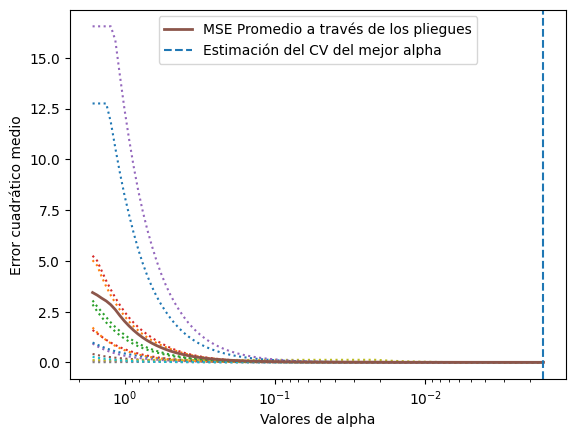

In [406]:
#Desplegar resultados
plt.figure()
plt.plot(modeloCafeNormalizado.alphas_, modeloCafeNormalizado.mse_path_, ':')
plt.plot(modeloCafeNormalizado.alphas_, modeloCafeNormalizado.mse_path_.mean(axis=-1), label='MSE Promedio a través de los pliegues', linewidth=2)
plt.axvline(modeloCafeNormalizado.alpha_, linestyle='--', label='Estimación del CV del mejor alpha')
plt.semilogx()
plt.legend()
ax=plt.gca()
ax.invert_xaxis()
plt.xlabel("Valores de alpha")
plt.ylabel("Error cuadrático medio")
plt.axis('tight')
plt.show()

## Lasso CV sin normalización de datos


In [407]:
modeloCafe = LassoCV(cv=15,).fit(datosCalificativos, etiquetas)

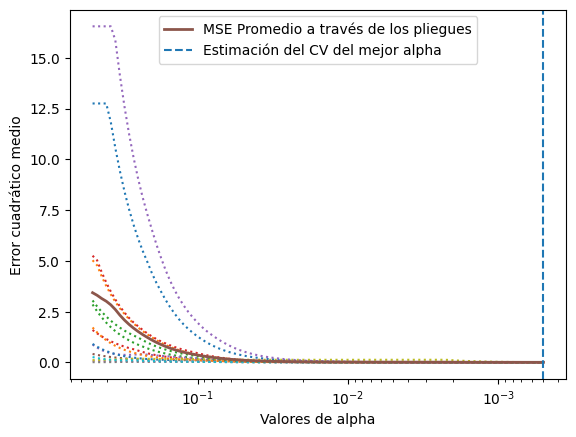

In [408]:
#Desplegar resultados
plt.figure()
plt.plot(modeloCafe.alphas_, modeloCafe.mse_path_, ':')
plt.plot(modeloCafe.alphas_, modeloCafe.mse_path_.mean(axis=-1), label='MSE Promedio a través de los pliegues', linewidth=2)
plt.axvline(modeloCafe.alpha_, linestyle='--', label='Estimación del CV del mejor alpha')
plt.semilogx()
plt.legend()
ax=plt.gca()
ax.invert_xaxis()
plt.xlabel("Valores de alpha")
plt.ylabel("Error cuadrático medio")
plt.axis('tight')
plt.show()

## Entrenamiento de Lasso en un conjunto completo de datos

In [409]:
#Primero saqué los alphas y los coeficientes de los datos respectivos
alphas, coeficientes, _ = lasso_path(StandardScaler().fit_transform(datosCalificativos), etiquetas)

In [410]:
#Desplegué las alphas para saber el mejor alpha
alphas

array([1.63511593, 1.52491459, 1.42214045, 1.32629294, 1.23690524,
       1.15354197, 1.0757971 , 1.00329197, 0.93567345, 0.87261219,
       0.81380105, 0.75895359, 0.70780265, 0.66009912, 0.61561065,
       0.57412055, 0.53542675, 0.49934078, 0.46568688, 0.43430115,
       0.4050307 , 0.37773299, 0.35227505, 0.32853289, 0.30639087,
       0.28574115, 0.26648316, 0.24852308, 0.23177346, 0.2161527 ,
       0.20158473, 0.1879986 , 0.17532812, 0.16351159, 0.15249146,
       0.14221405, 0.13262929, 0.12369052, 0.1153542 , 0.10757971,
       0.1003292 , 0.09356735, 0.08726122, 0.08138011, 0.07589536,
       0.07078027, 0.06600991, 0.06156107, 0.05741206, 0.05354268,
       0.04993408, 0.04656869, 0.04343011, 0.04050307, 0.0377733 ,
       0.0352275 , 0.03285329, 0.03063909, 0.02857412, 0.02664832,
       0.02485231, 0.02317735, 0.02161527, 0.02015847, 0.01879986,
       0.01753281, 0.01635116, 0.01524915, 0.0142214 , 0.01326293,
       0.01236905, 0.01153542, 0.01075797, 0.01003292, 0.00935

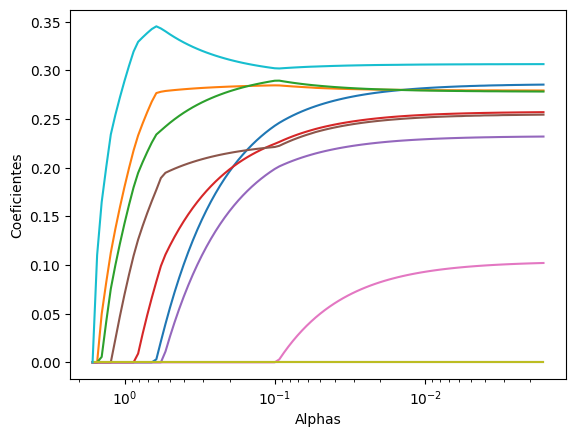

In [411]:
#Desplegué el resultado en gráfica
plt.semilogx(alphas, coeficientes.T)
plt.xlabel('Alphas')
plt.ylabel('Coeficientes')
plt.axis('tight')
ax=plt.gca()
ax.invert_xaxis()
#plt.savefig('cafeLassoCoefCurves.png', dpi=500)
plt.show()

In [412]:
#Luego encontré el coeficiente de ordenamiento e imprimí los datos correspondientes
numeroAtributos, numeroAlphas = coeficientes.shape
print("Número de atributos: ", numeroAtributos)
print("Número de los coeficientes: ", numeroAlphas,"\n(Debe coindicir con el número de alphas",alphas.shape,")")

Número de atributos:  10
Número de los coeficientes:  100 
(Debe coindicir con el número de alphas (100,) )


In [413]:
#Desplegué las características ordenadas por cómo entraron al modelo
listaNz = []
for iAlpha in range(numeroAlphas):
    listaCoeficientes = coeficientes[:,iAlpha]
    coeficienteNz = [indice for indice in range(numeroAtributos) if listaCoeficientes[indice] != 0.0]
    for iCoef in coeficienteNz:
        if not (iCoef in listaNz):
            listaNz.append(iCoef)
print("Características ordenadas por cómo entraron al modelo:\n")
_ = [print(x+1, datosCalificativos.columns[listaNz[x]]) for x in range(len(listaNz))]
print("\nAparecen 8 columnas porque los coeficientes de las columnas 'Clean Cup' y 'Sweetness' dan 0 ")

Características ordenadas por cómo entraron al modelo:

1 Overall
2 Flavor
3 Aftertaste
4 Balance
5 Acidity
6 Aroma
7 Body
8 Uniformity

Aparecen 8 columnas porque los coeficientes de las columnas 'Clean Cup' y 'Sweetness' dan 0 


In [414]:
#Agarré el valor de alpha del ejemplo dado en clase
alphaEstrella = 0.00029358033516050650
#Busqué los indices de los alphas mayores al alphaEstrella
indicesMayoresAlphaEstrella = [indice for indice in range(len(alphas)) if alphas[indice] > alphaEstrella]
#Agarré el índice mayor de la variable anterior
indiceEstrella = max(indicesMayoresAlphaEstrella)

In [415]:
#Saqué los coeficientes estrella
coeficientesEstrella = coeficientes[:, indiceEstrella]
#Convertí dichos coeficientes en su valor absoluto
coeficientesAbsolutos = [abs(a) for a in coeficientesEstrella]
#Ordené los coeficientes antes mencionados de reversa mami
coeficientesOrdenados = sorted(coeficientesAbsolutos, reverse=True)

In [416]:
idTamanioCoeficiente = [coeficientesAbsolutos.index(a) for a in coeficientesOrdenados if not(a == 0.0)]
print("Características ordenadas por el tamaño del coeficiente de las características normalizadas:")
[print(i+1, datosCalificativos.columns[idTamanioCoeficiente[i]]) for i in range(len(idTamanioCoeficiente))]

Características ordenadas por el tamaño del coeficiente de las características normalizadas:
1 Overall
2 Aroma
3 Flavor
4 Aftertaste
5 Acidity
6 Balance
7 Body
8 Uniformity


[None, None, None, None, None, None, None, None]

In [417]:
#Saqué el modelo de Lasso
lasso_model = Lasso(alpha=alphaEstrella)
lasso_model.fit(StandardScaler().fit_transform(datosCalificativos),etiquetas)

Lasso(alpha=0.0002935803351605065)

In [418]:
#Imprimí los coeficientes del modelo
print("Coeficientes relativos a las características naturales (del modelo entrenado en características normalizadas)")

[print(a,'\t\t',b) for(a,b) in zip(datosCalificativos.columns,lasso_model.coef_)]

Coeficientes relativos a las características naturales (del modelo entrenado en características normalizadas)
Aroma 		 0.28597730943071664
Flavor 		 0.2791154017374692
Aftertaste 		 0.2777732415597603
Acidity 		 0.2573302212950953
Body 		 0.23228275180779262
Balance 		 0.2550460780330354
Uniformity 		 0.10350802198593848
Clean Cup 		 0.0
Sweetness 		 0.0
Overall 		 0.30667453667014477


[None, None, None, None, None, None, None, None, None, None]

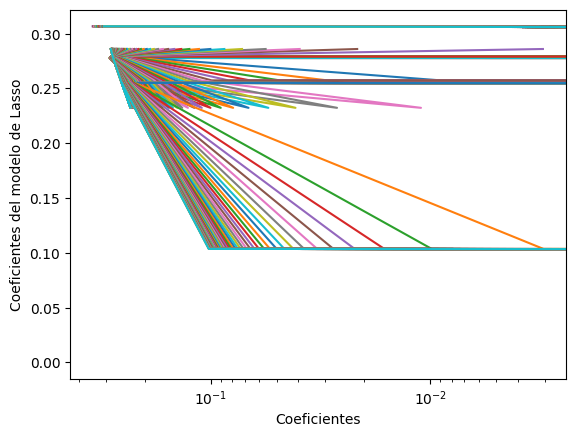

In [419]:
#Desplegué gráfica con los coeficientes
plt.semilogx(coeficientes, lasso_model.coef_)
plt.xlabel('Coeficientes')
plt.ylabel('Coeficientes del modelo de Lasso')
plt.axis('tight')
ax=plt.gca()
ax.invert_xaxis()
#plt.savefig('cafeLassoCoefCurves.png', dpi=500)
plt.show()

# Gráficas para ver más resultados

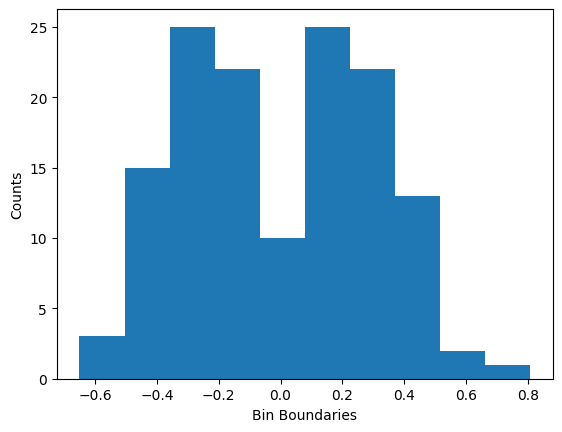

In [420]:
#Entrené y grafiqué el histograma de error
modelo_del_cafe = linear_model.LinearRegression()
modelo_del_cafe.fit(datosEntreno, etiquetasEntreno)
errorVector = etiquetasEntreno - modelo_del_cafe.predict(datosEntreno)
plt.hist(errorVector)
plt.xlabel("Bin Boundaries")
plt.ylabel("Counts")
plt.show()

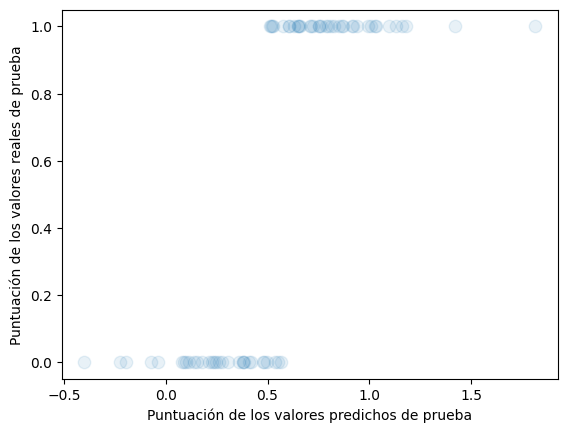

In [421]:
#Gráfica de dispersión de los valores reales vs los predichos
plt.scatter(modelo_del_cafe.predict(datosPrueba), etiquetasPrueba, s=80, alpha=0.10)
plt.xlabel("Puntuación de los valores predichos de prueba")
plt.ylabel("Puntuación de los valores reales de prueba")
plt.show()

Text(0, 0.5, 'Valor de los atributos')

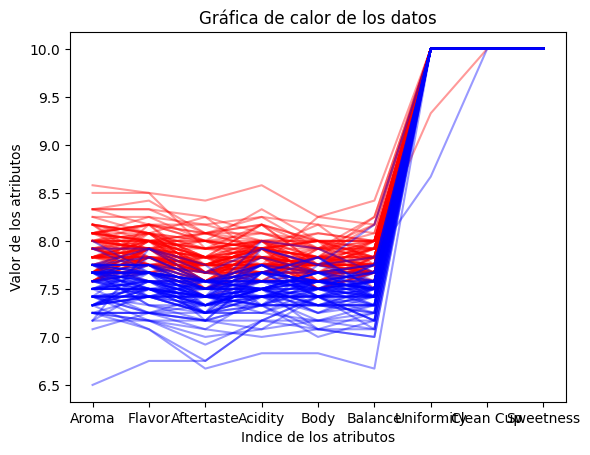

In [422]:
#Grafica del mapa de calor de los datos
for i in range (len(etiquetas)):
    if (etiquetas.iloc[i] > 83.5):
        pcolor = "red"
    else:
        pcolor = "blue"
    
    filaDatos =  datosCalificativos.iloc[i,0:len(datosCalificativos.columns)-1]
    filaDatos.plot(color=pcolor, alpha=0.4)
    
plt.title("Gráfica de calor de los datos")
plt.xlabel("Indice de los atributos")
plt.ylabel("Valor de los atributos")

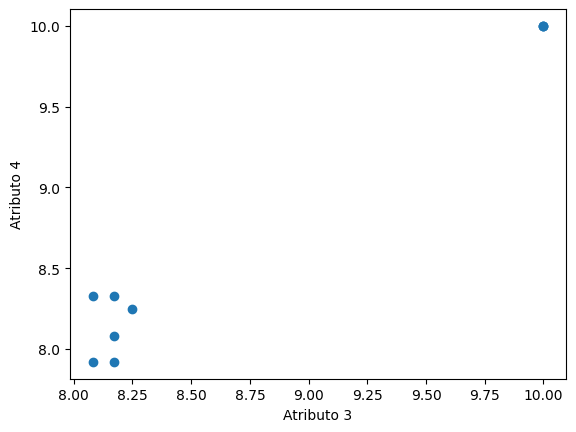

In [423]:
#Calcular las correlaciones entre los atributos de valor real  y gráficar
atributo3 = datosCalificativos.iloc[3,0:len(datosCalificativos.columns)-1]
atributo4 = datosCalificativos.iloc[4,0:len(datosCalificativos.columns)-1]

plt.scatter(atributo3, atributo2)

plt.xlabel("Atributo 3")
plt.ylabel("Atributo 4")

plt.show()

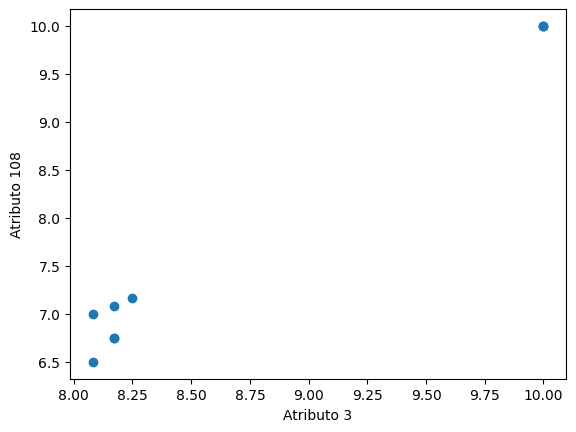

In [424]:
#Calcular las correlaciones entre los atributos de valor real y gráficar
atributo3 = datosCalificativos.iloc[3,0:len(datosCalificativos.columns)-1]
atributo205 = datosCalificativos.iloc[205,0:len(datosCalificativos.columns)-1]

plt.scatter(atributo3, atributo205)

plt.xlabel("Atributo 3")
plt.ylabel("Atributo 108")

plt.show()

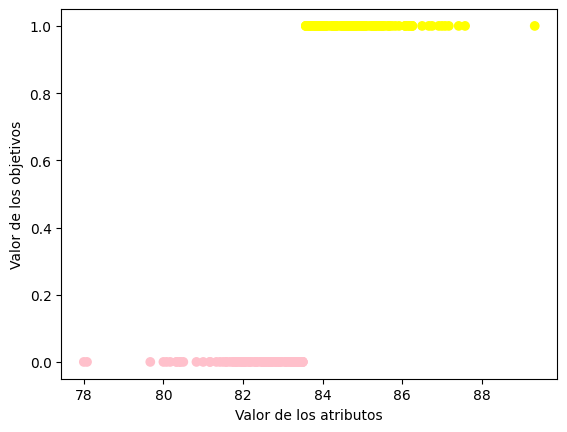

In [425]:
#Gráfica de dispersión
objetivos = []
color = []
for i in range(len(etiquetas)):
    if etiquetas.iloc[i] > 83.5:
        objetivos.append(1.0)
        color.append("yellow")
    else:
        objetivos.append(0)
        color.append("pink")
fila = etiquetas.iloc[0:len(etiquetas)]
plt.scatter(fila, objetivos, color=color)
plt.xlabel("Valor de los atributos")
plt.ylabel("Valor de los objetivos")
plt.show()

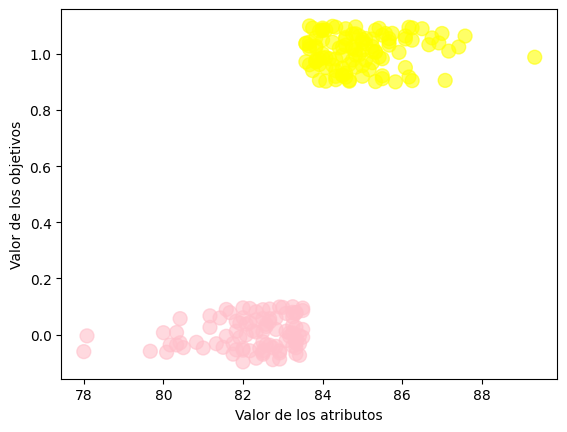

In [426]:
#Gráfica de dispersión con valores uniformes
from random import uniform

objetivos = []
color = []
for i in range(len(etiquetas)):
    if etiquetas.iloc[i] > 83.5:
        objetivos.append(1.0 + uniform(-0.1,0.1))
        color.append("yellow")
    else:
        objetivos.append(0 + uniform(-0.1,0.1))
        color.append("pink")


fila = etiquetas.iloc[0:len(etiquetas)]
plt.scatter(fila, objetivos, color=color, alpha=0.6, s=100)
plt.xlabel("Valor de los atributos")
plt.ylabel("Valor de los objetivos")
plt.show()